## This script analysis the zooniverse data so we can appropriatly preprocess the data

In [1]:
import numpy as np
import pandas as pd

Number of rows: 
Number of volunteers: 
Original Dataset Shape:  (22841, 14)
Number of rows after dropping undesirable rows: 
Number of volunteers after dropping undesirable rows: 
Distribution of annotations per volunteer before removing outlier : 
Distribution of annotations per volunteer after removing outlier : 
mode:  0    4
dtype: int64
0.25     6.0
0.50    14.0
0.75    34.0
Name: user_name, dtype: float64


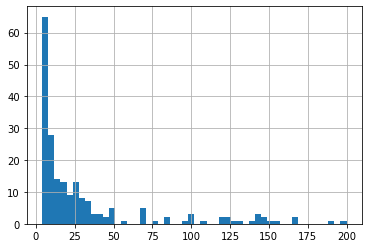

In [35]:
# file path to zooniverse
dataset = pd.read_csv (r'C:\Users\rb01243\OneDrive - University of Surrey\Desktop\zoon data\Labels\dental-disease-labelling-easy-classifications.csv')

# Parameter to choose the minimum number of classifications a volunteer has to complete
minClss = 4


print("Number of rows: ")
print('Number of volunteers: ')


print('Original Dataset Shape: ', dataset.shape)


# removes banned users
fle = open("banned.txt", "r")
banedUsers = eval(fle.read())
for bnd in banedUsers:
    dataset = dataset[dataset['user_name'] != bnd]
    
    
ds2 = dataset[dataset["annotations"].str.contains('"value":null') == False] # removes null bounding boxes
ds2 = ds2[ds2["annotations"].str.contains('"value":\[]') == False] # removes empty classifications


# removes rows with a null value in the annoation column


# removes users with less that the desired number of classifications
#ds2 = ds2[ds2.groupby('user_name').user_name.transform('count') >= minClss]

ds3 = ds2['user_name'].astype(str)
ds3 = ds3.value_counts()
ds3 = ds3[ds3 >= minClss]


print("Number of rows after dropping undesirable rows: ")


print('Number of volunteers after dropping undesirable rows: ')
    

print("Distribution of annotations per volunteer before removing outlier : ")
#ds3.hist(bins=50)

# remove outlier volunteers that have
ds4 = ds3[ds3 < 250]
print("Distribution of annotations per volunteer after removing outlier : ")
ds4.hist(bins=50)

print('mode: ', ds3.mode())
print(ds3.quantile([0.25,0.5,0.75]))